In [1]:
# In terminal:
# conda env create -f relatio.yml

In [2]:
import relatio
import pandas as pd

In [3]:
data = pd.read_excel('FOMC_statements_split_cleaned.xlsx')
data

,Speaker,Statement,Date,Statement_no,Chair,Vice_chair,Day_of_meeting,Intraday_recess
0,MR. BURNS,"Gentlemen, we’re ready.",1976-03-29,1,MR. BURNS,MR. VOLCKER,1,0
1,MR. BURNS,This will now be a meeting of the Federal Open...,1976-03-29,1,MR. BURNS,MR. VOLCKER,1,0
2,MR. BURNS,I’m going to call on Tom O’Connell to advise u...,1976-03-29,1,MR. BURNS,MR. VOLCKER,1,0
3,MR. O’CONNELL,"Yes, Mr. Chairman.",1976-03-29,2,MR. BURNS,MR. VOLCKER,1,0
4,MR. O’CONNELL,The Committee will recall that the lawsuit of ...,1976-03-29,2,MR. BURNS,MR. VOLCKER,1,0
...,...,...,...,...,...,...,...,...
728403,MR. WILCOX,Thank you for the privilege of serving all of ...,2018-12-19,265,MR. POWELL,MR. WILLIAMS,2,0
728404,MR. POWELL,Thanks very much.,2018-12-19,266,MR. POWELL,MR. WILLIAMS,2,0
728405,MR. POWELL,Our final agenda item is to confirm that the n...,2018-12-19,266,MR. POWELL,MR. WILLIAMS,2,0
728406,MR. POWELL,And a buffet luncheon will be served today at ...,2018-12-19,266,MR. POWELL,MR. WILLIAMS,2,0


In [20]:
data[data['Date'].str[:4] == '2010']

,Speaker,Statement,Date,Statement_no,Chair,Vice_chair,Day_of_meeting,Intraday_recess
506718,MR. BERNANKE,"Good afternoon, everybody.",2010-01-27,1,MR. BERNANKE,MR. DUDLEY,1,0
506719,MR. BERNANKE,This will be an FOMC meeting for the first six...,2010-01-27,1,MR. BERNANKE,MR. DUDLEY,1,0
506720,MR. BERNANKE,This is the annual organizational meeting.,2010-01-27,1,MR. BERNANKE,MR. DUDLEY,1,0
506721,MR. BERNANKE,Let me first recognize the Presidents rotating...,2010-01-27,1,MR. BERNANKE,MR. DUDLEY,1,0
506722,MR. BERNANKE,Organizational item number 1 is the election o...,2010-01-27,1,MR. BERNANKE,MR. DUDLEY,1,0
...,...,...,...,...,...,...,...,...
527608,MR. BERNANKE,The Board is also involved in this project.,2010-12-14,180,MR. BERNANKE,MR. DUDLEY,1,0
527609,MR. BERNANKE,So I look forward to that discussion.,2010-12-14,180,MR. BERNANKE,MR. DUDLEY,1,0
527610,MR. BERNANKE,There will be a lunch as soon as the meeting i...,2010-12-14,180,MR. BERNANKE,MR. DUDLEY,1,0
527611,MR. BERNANKE,"Thank you all very much, and have a safe trip ...",2010-12-14,180,MR. BERNANKE,MR. DUDLEY,1,0


In [21]:
df = data[data['Date'].str[:4] == '2010'][['Statement']].reset_index() # only 2010 to begin
df.columns = ['id', 'doc']
df

,id,doc
0,506718,"Good afternoon, everybody."
1,506719,This will be an FOMC meeting for the first six...
2,506720,This is the annual organizational meeting.
3,506721,Let me first recognize the Presidents rotating...
4,506722,Organizational item number 1 is the election o...
...,...,...
20890,527608,The Board is also involved in this project.
20891,527609,So I look forward to that discussion.
20892,527610,There will be a lunch as soon as the meeting i...
20893,527611,"Thank you all very much, and have a safe trip ..."


In [22]:
from relatio import Preprocessor
p = Preprocessor(
    spacy_model = "en_core_web_sm",
    remove_punctuation = True,
    remove_digits = True,
    lowercase = True,
    lemmatize = True,
    remove_chars = ["\"",'-',"^",".","?","!",";","(",")",",",":","\'","+","&","|","/","{","}",
                    "~","_","`","[","]",">","<","=","*","%","$","@","#","’"],
    stop_words = [],
    n_process = -1,
    batch_size = 100
)
df = p.split_into_sentences(
    df, output_path = None, progress_bar = True
)

Splitting into sentences...


100%|██████████| 20895/20895 [00:12<00:00, 1700.46it/s]


In [23]:
from relatio import SRL

SRL = SRL(
    path = "https://storage.googleapis.com/allennlp-public-models/openie-model.2020.03.26.tar.gz",
    batch_size = 10,
    cuda_device = -1
)

srl_res = SRL(df['sentence'][0:1000], progress_bar=True)

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...


Output()

Running SRL...


100%|██████████| 100/100 [01:50<00:00,  1.10s/it]


In [24]:
from relatio import extract_roles

roles, sentence_index = extract_roles(
    srl_res, 
    used_roles = ["ARG0","B-V","B-ARGM-NEG","B-ARGM-MOD","ARG1","ARG2"],
    only_triplets = True,
    progress_bar = True
)

for d in roles[0:20]: print(d)
sentence_index, roles = p.extract_svos(df['sentence'], expand_nouns = True, only_triplets = False, progress_bar = True) 
for svo in roles[0:20]: print(svo)
postproc_roles = p.process_roles(roles, 
                                 max_length = 50,
                                 progress_bar = True,
                                 output_path = './output/postproc_roles.json')
for d in postproc_roles[0:20]: print(d)

Extracting semantic roles...


100%|██████████| 1000/1000 [00:00<00:00, 8561.31it/s]


{'ARG0': 'Matt', 'B-V': 'reminds', 'ARG2': 'me'}
{'ARG0': 'we', 'B-V': 'will', 'ARG1': 'make it a joint meeting with the Board'}
{'ARG0': 'we', 'B-V': 'make', 'B-ARGM-MOD': 'will', 'ARG1': 'it a joint meeting with the Board'}
{'ARG0': 'me', 'B-V': 'recognize', 'ARG1': 'the Presidents rotating into voting status : Presidents Bullard , Hoenig , Pianalto , and Rosengren'}
{'ARG0': 'me', 'B-V': 'recognize', 'ARG1': 'Governor Kohn'}
{'ARG0': 'I', 'B-V': 'ca', 'ARG1': 'n’t think of a better person to herd all of these cats'}
{'ARG0': 'n’t', 'B-V': 'think', 'B-ARGM-MOD': 'ca', 'ARG1': 'of a better person to herd all of these cats'}
{'ARG0': 'a better person', 'B-V': 'herd', 'ARG1': 'all of these cats'}
{'ARG0': 'you', 'B-V': 'read', 'B-ARGM-MOD': 'Would', 'ARG1': 'the list , Matt'}
{'ARG0': 'I', 'B-V': 'have', 'B-ARGM-MOD': 'may', 'ARG1': 'a second for the motion that we approve these officers'}
{'ARG0': 'we', 'B-V': 'approve', 'ARG1': 'these officers'}
{'ARG0': 'You', 'B-V': 'received', 'ARG

100%|██████████| 21090/21090 [00:15<00:00, 1375.11it/s]


{'ARG0': 'Matt', 'B-V': 'reminds', 'ARG1': 'me'}
{'ARG0': 'we', 'B-V': 'make'}
{'B-V': 'Let'}
{'ARG0': 'me', 'B-V': 'recognize'}
{'ARG0': 'the Presidents', 'B-V': 'rotating'}
{'B-V': 'Let'}
{'ARG0': 'me', 'B-V': 'recognize', 'ARG1': 'Governor Kohn'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'B-V': 'nominate', 'ARG1': 'Ben Bernanke'}
{'ARG0': 'I', 'B-V': 'think'}
{'B-V': 'herd', 'ARG1': 'all'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'B-V': 'nominate', 'ARG1': 'Bill Dudley'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'ARG0': 'you', 'B-V': 'read', 'ARG1': 'the list'}
{'B-V': 'Thank', 'ARG1': 'you'}
{'ARG0': 'I', 'B-V': 'have', 'ARG1': 'a second'}
{'ARG0': 'we', 'B-V': 'approve', 'ARG1': 'these officers'}
Cleaning phrases for role ARG0...


100%|██████████| 33891/33891 [00:11<00:00, 2996.70it/s]


Cleaning phrases for role B-V...


100%|██████████| 58047/58047 [00:16<00:00, 3521.88it/s]


Cleaning phrases for role B-ARGM-MOD...


0it [00:02, ?it/s]


Cleaning phrases for role ARG1...


100%|██████████| 23979/23979 [00:08<00:00, 2727.54it/s]


Cleaning phrases for role ARG2...


0it [00:00, ?it/s]

0it [00:02, ?it/s]


{'ARG0': 'matt', 'B-V': 'remind', 'ARG1': 'i'}
{'ARG0': 'we', 'B-V': 'make'}
{'B-V': 'let'}
{'ARG0': 'i', 'B-V': 'recognize'}
{'ARG0': 'the president', 'B-V': 'rotate'}
{'B-V': 'let'}
{'ARG0': 'i', 'B-V': 'recognize', 'ARG1': 'governor kohn'}
{'B-V': 'thank', 'ARG1': 'you'}
{'B-V': 'nominate', 'ARG1': 'ben bernanke'}
{'ARG0': 'i', 'B-V': 'think'}
{'B-V': 'herd', 'ARG1': 'all'}
{'B-V': 'thank', 'ARG1': 'you'}
{'B-V': 'thank', 'ARG1': 'you'}
{'B-V': 'nominate', 'ARG1': 'bill dudley'}
{'B-V': 'thank', 'ARG1': 'you'}
{'B-V': 'thank', 'ARG1': 'you'}
{'ARG0': 'you', 'B-V': 'read', 'ARG1': 'the list'}
{'B-V': 'thank', 'ARG1': 'you'}
{'ARG0': 'i', 'B-V': 'have', 'ARG1': 'a second'}
{'ARG0': 'we', 'B-V': 'approve', 'ARG1': 'these officer'}


In [25]:
from relatio.utils import load_roles
postproc_roles = load_roles('./output/postproc_roles.json')
known_entities = p.mine_entities(
    df['sentence'], 
    clean_entities = True, 
    progress_bar = True,
    output_path = './output/entities.pkl'
)

for n in known_entities.most_common(10): print(n)
from relatio.utils import load_entities
known_entities = load_entities('./output/entities.pkl')

top_known_entities = [e[0] for e in list(known_entities.most_common(100)) if e[0] != '']

Mining named entities...


100%|██████████| 21090/21090 [00:13<00:00, 1583.69it/s]


('chairman', 730)
('treasury', 564)
('committee', 557)
('mbs', 356)
('u s', 259)
('fomc', 226)
('laugh', 182)
('european', 178)
('brian', 167)
('fed', 165)


Downloading:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Computing phrase embeddings...


100%|██████████| 5973/5973 [01:15<00:00, 79.41it/s]


Computing phrase embeddings...


100%|██████████| 9401/9401 [01:56<00:00, 80.76it/s]


Computing phrase embeddings...


100%|██████████| 13659/13659 [02:52<00:00, 78.96it/s]


Dimension reduction via PCA...
PCA parameters:
{'n_components': 50, 'svd_solver': 'full'}
Dimension reduction via UMAP...
UMAP parameters:
{'n_neighbors': 15, 'n_components': 2, 'random_state': 0}


/opt/conda/envs/relatio/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Clustering phrases into clusters...
Clustering parameters chosen in this range:
{'n_clusters': [13, 33, 67, 101, 136], 'random_state': 0}
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/opt/conda/envs/relatio/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/relatio/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/relatio/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/relatio/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

The silhouette score suggests the optimal number of clusters is 136. This corresponds to index 4.
The elbow method (inertia score) suggests the optimal number of clusters is 33. This corresponds to index 1.
Labeling the clusters by the most frequent phrases...


/opt/conda/envs/relatio/lib/python3.8/site-packages/relatio/narrative_models.py:585: RuntimeWarning: Multiple labels for cluster 14- 2 shown: [('the outlook', 45), ('the possibility', 45)]. First one is picked.
  warnings.warn(
/opt/conda/envs/relatio/lib/python3.8/site-packages/relatio/narrative_models.py:585: RuntimeWarning: Multiple labels for cluster 13- 2 shown: [('a lot', 125), ('one', 125)]. First one is picked.
  warnings.warn(
/opt/conda/envs/relatio/lib/python3.8/site-packages/relatio/narrative_models.py:585: RuntimeWarning: Multiple labels for cluster 14- 2 shown: [('our projection', 10), ('the flexibility', 10)]. First one is picked.
  warnings.warn(
/opt/conda/envs/relatio/lib/python3.8/site-packages/relatio/narrative_models.py:585: RuntimeWarning: Multiple labels for cluster 97- 2 shown: [('commitment', 8), ('our commitment', 8)]. First one is picked.
  warnings.warn(
/opt/conda/envs/relatio/lib/python3.8/site-packages/relatio/narrative_models.py:585: RuntimeWarning: Mult

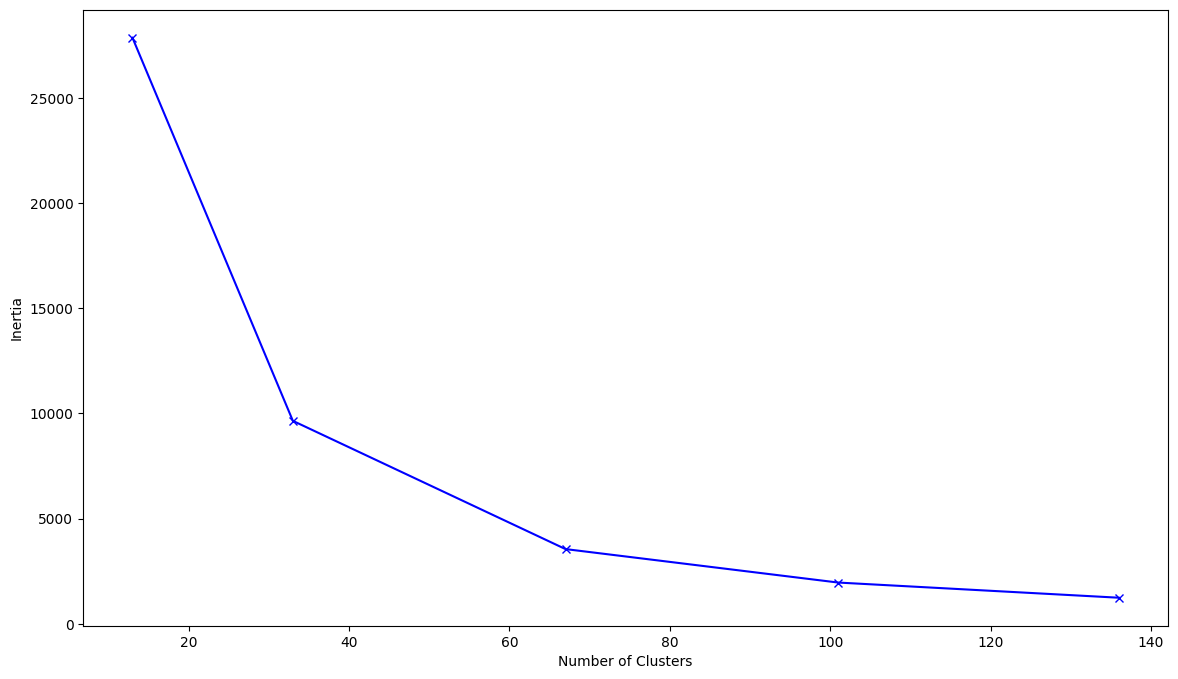


Predicting entities for role: ARG0...
Computing phrase embeddings...


  4%|▍         | 1334/33861 [46:19<18:49:22,  2.08s/it]


KeyboardInterrupt: 

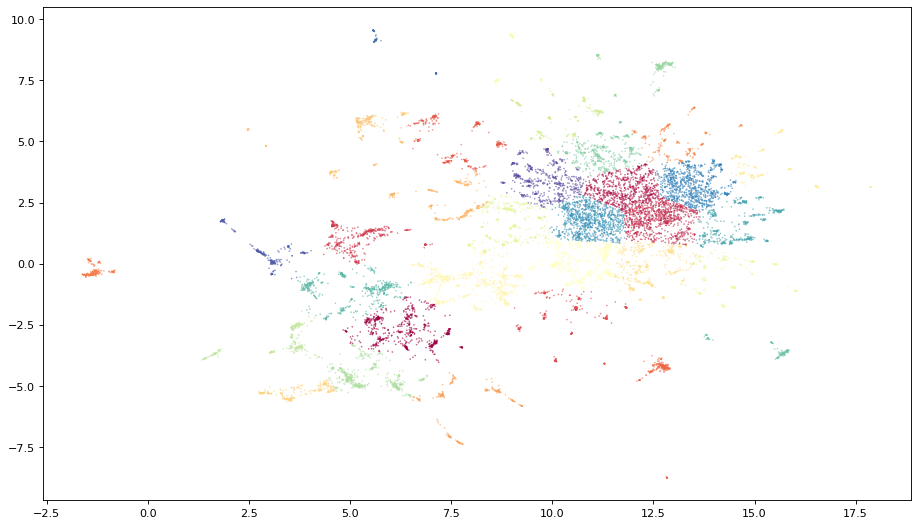

In [26]:
from relatio.narrative_models import NarrativeModel

m = NarrativeModel(
    clustering = 'kmeans',
    PCA = True,
    UMAP = True,
    roles_considered = ['ARG0', 'B-V', 'B-ARGM-NEG', 'ARG1'],
    roles_with_known_entities = ['ARG0','ARG1'],
    known_entities = top_known_entities,
    assignment_to_known_entities = 'embeddings',
    roles_with_unknown_entities = ['ARG0','ARG1'],
    threshold = 0.1
)    
             
m.fit(postproc_roles, progress_bar = True) 
m.plot_selection_metric(metric = 'inertia') 
m.plot_clusters(path = './output/clusters.pdf') 
m.clusters_to_txt(path = './output/clusters.txt')
narratives = m.predict(postproc_roles, progress_bar = True)

In [ ]:
from relatio.utils import prettify

pretty_narratives = []
for n in narratives: 
    pretty_narratives.append(prettify(n))

for i in range(10):           
    print(roles[i])
    print(postproc_roles[i])
    print(pretty_narratives[i])

In [ ]:
from relatio import build_graph, draw_graph

G = build_graph(
    narratives, 
    top_n = 100, 
    prune_network = True
)

draw_graph(
    G,
    notebook = True,
    show_buttons = False,
    width="1600px",
    height="1000px",
    output_filename = './output/network_of_narratives.html'
    )

In [ ]:
import pickle as pk 

with open('./output/narrative_model.pkl','wb') as f:
    pk.dump(m,f)
with open('./output/narrative_model.pkl','rb') as f:
    m = pk.load(f)